<a href="https://colab.research.google.com/github/JALVARADORUIZ/UB_Proyecto/blob/main/TFM_Testeo_predicci%C3%B3n_nuevas_im%C3%A1genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Procesado de nuevas imágenes**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 
from keras.applications.vgg16 import VGG16 
from keras.models import Model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import torch
import torch.optim as optim
import requests
from torchvision import transforms, models
import joblib
from sklearn.preprocessing import StandardScaler


 

**Input**

In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()

Saving 10523934.jpg to 10523934 (1).jpg


In [ ]:
filename = next(iter(uploaded))
filename

'10523934.jpg'

In [ ]:
import matplotlib.image as mpimg

In [ ]:
import cv2

**Procesado**

In [ ]:
model = VGG16()


   Unnamed: 0 etiqueta
0           0     alto
1           1     bajo
2           2    medio
Cargando modelos...


[1]
(1, 128, 128, 3)
Método de predicción: <keras.engine.sequential.Sequential object at 0x7f7320493610>
Precio: [1]
Método de predicción: <keras.engine.sequential.Sequential object at 0x7f722d56ffd0>
Precio: [[58.45548]]


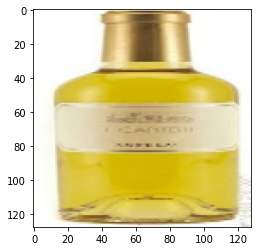

In [ ]:
precio1 = pd.read_csv('/content/drive/MyDrive/TFM_Máster BDDS/Diccionarios/dicc_price_cat_svm.csv')
print(precio1)
print(f'Cargando modelos...')
precio_cat_cnn = joblib.load('/content/drive//MyDrive/TFM_Máster BDDS/Modelos/modelo_cnn_dropout_precio_categorica_v2.pkl')
precio_cont_ccn = joblib.load('/content/drive//MyDrive/TFM_Máster BDDS/Modelos/modelo_cnn_precio_continua.pkl')

image = cv2.imread(filename, cv2.IMREAD_COLOR)
image = cv2.resize(image, (128, 128))
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image = np.array(image)
plt.imshow(image, cmap=plt.cm.binary)
image = image.reshape(1,128,128,3)

z = np.argmax(precio_cat_cnn.predict(image),axis=1)
print(z)
print(image.shape)
print(f'Método de predicción: {precio_cat_cnn}')
print(f'Precio: {np.argmax(precio_cat_cnn.predict(image),axis=1)}')
print(f'Método de predicción: {precio_cont_ccn}')
print(f'Precio: {precio_cont_ccn.predict(image)}')

Shape Original:(224, 224, 3)
Imagen reshaped a 224,224:(1, 224, 224, 3)
Preprocesado de imagen...
Cargando VGG16 model...


Extrayendo principales componentes...
Features[[0.        0.        0.        ... 1.8096452 0.        1.6565018]]
(array([], dtype=int64), array([], dtype=int64))
Corriendo análisis PCA...
         0       1       2       3       4       5       6       7       8     \
count  2000.0  2000.0  2000.0  2000.0  2000.0  2000.0  2000.0  2000.0  2000.0   
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

              9     ...    4086    4087    4088    4089    4090    4091  \
count 

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_pca.py:595: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var.sum()


Shape: (1, 4096)
SVM:
Cargando modelos...
[2]
Precio: [50.31743505]
Precio: ['medio']


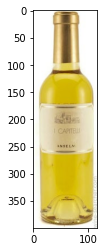

In [ ]:
img = mpimg.imread(filename)
plt.imshow(img)
img = load_img(filename, target_size=(224,224))
img = np.array(img)
print(f'Shape Original:{img.shape}')
reshaped_img = img.reshape(1,224,224,3)
print(f'Imagen reshaped a 224,224:{reshaped_img.shape}')
print('Preprocesado de imagen...')
x = preprocess_input(reshaped_img)
print(f'Cargando VGG16 model...')
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
print(f'Extrayendo principales componentes...')
features = model.predict(x, use_multiprocessing=True)
print(f'Features{features}')
features = np.array(features)
features.shape
bad_indices = np.where(np.isinf(features))

print(bad_indices)
print(f'Corriendo análisis PCA...')

df= pd.DataFrame(features)
df= pd.DataFrame(np.repeat(df.values, 2000, axis=0))
print(df.describe())
pca = PCA(n_components=1000 ,random_state=33)
pca.fit(df)
df = pca.transform(df)

print(f'Shape: {features.shape}')
object = StandardScaler()
df = object.fit_transform(df)

df = pd.DataFrame(df)
df = df.head(1)
print('SVM:')
precio_cat = pd.read_csv('/content/drive/MyDrive/TFM_Máster BDDS/Diccionarios/dicc_price_cat_svm.csv')

print(f'Cargando modelos...')
precio_cont_svr = joblib.load('/content/drive//MyDrive/TFM_Máster BDDS/Modelos/modelo_svm_precio_continua.pkl')
precio_cat_svm = joblib.load('/content/drive//MyDrive/TFM_Máster BDDS/Modelos/modelo_svm_precio_categorica.pkl')
print(precio_cat_svm.predict(df.values))
print(f"Precio: {precio_cont_svr.predict(df.values)}")
print(f"Precio: {precio_cat['etiqueta'].iloc[precio_cat_svm.predict(df.values)].values}")